# Unsupervised

Unsupervised machine learning algorithm digunakan untuk mengelompokkan data tida terstruktur menurut kesamaan dan pola yang berbeda dalam kumpulan data

Unsupervised algorithm berfungsi dengan data tak berlabel. Tujuannya adalah eksplorasi. Jika supervised machine learning berfungsi di bawah aturan yang ditetapkan dengan jelas, unsupersived learning berfungsi dalam kondisi hasil yang tidak diketahui dan karenannya perlu didefinisikan dalam proses.

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast = load_breast_cancer()

In [5]:
breast_data = breast.data

In [6]:
breast_data.shape

(569, 30)

Memuat label dan periksa bentuknya.

In [7]:
breast_labels = breast.target

In [8]:
breast_labels.shape

(569,)

Sekarang kita akan mengimpor numpy karena kita akan membentuk kembali breast_labels untuk digabungkan dengan breast_data sehingga kita akhirnnya bisa membuat DataFrame yang akan memiliki data dan label.

In [9]:
import numpy as np

In [10]:
labels = np.reshape(breast_labels,(569,1))

Setelah reshapping label, kita akan concatenate data dan label di sepanjang second axis, yang berarti bentuk akhir dari array akan menjadi 569 x 31.

In [11]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [12]:
final_breast_data.shape

(569, 31)

Sekarang kita akan mengimpor pandas untuk membuat DataFrame dari data akhirr untuk merepresentasikan data secara tabular.

In [13]:
import pandas as pd

In [14]:
breast_dataset = pd.DataFrame(final_breast_data)

Print the features

In [15]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Jika kita melihat dari array fitur, bidang label hilang. Oleh karena itu, kita harus menambahkan secara manual ke array fitur karena kita akan menyamakan array ini dengan nama kolom dari dataframe breast_dataset kita.

In [16]:
features_labels = np.append(features, 'label')

Sekarang kita akan menyematkan nama kolom ke dataframe breast_dataset.

In [17]:
breast_dataset.columns = features_labels

In [18]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Karena label asli dalam format 0,1 kita akan mengubah label menjadi benign dan malignant menggunakan fungsi replace. Kita akan menggunakan inplace = True yang akan memodifikasi dataframe breast_dataset.

In [30]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [31]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


## Data Visualization using PCA

Kita mulai dengan Standardizing data karena keluaran PCA dipengaruhi berdasarkan skala fitur data.

In [32]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) #normalizing the features

In [33]:
x.shape

(569, 30)

Kita ubah fitur yang dinormalisasi menjadi format tabell dengan bantuan DataFrame.

In [34]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x, columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


Sekarang sampai pada critical part, baberapa baris kode berikutnya akan memproyeksikan 3 dimensi Breast Cancer data ke 2 dimensi principal components.

Menggunakan library sklearn untuk mengimpor modul PCA, dan dalam metode PCA, kita akan mengirimkan jumlah komponen (n_components = 2) dan terakhir memanggil fit_transform pada data agregat. Di sini, beberapa komponen mewakili dimensi yang lebih rendah di mana kita akan memproyeksikan data dimensi yang lebih tinggi.

In [35]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

Selanjutnya, mari buat DataFrame yang akan memiliki nilai principal component untuk semua 569 sampel.

In [36]:
principal_breast_Df = pd.DataFrame(data=principalComponents_breast,
                                         columns=['principal component 1',
                                                 'principal component 2'])

In [37]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Setelah kita memiliki principal components, kita dapat menemukan explained_variance_ratio. Ini akan memberi kita jumlah informasi atau varians yang dimiliki setiap principal component setelah memproyeksikan data ke subruang dimensi yang lebih rendah.

In [38]:
print('Explained varition per principal component:{}'.format(pca_breast.explained_variance_ratio_))

Explained varition per principal component:[0.44272026 0.18971182]


Dari hasil di atas, didapat bahwa principal component 1 menampung 44,2% informasi sedangkan pricipal component 2 hanya menampung 19% informasi. Juga, hal lain yang perlu diperhatikan adalah saat memproyeksikan data tiga puluh dimensi menjadi data dua dimensi, 36,8% informasi hilang.

Mari kita gambarkan visualisasi dari 569 sampel di sepanjang sumbu principal component - 1 dan principal component - 2. Ini akan memberikan kita wawasan yang baik tentang bagaimana sampel kita didistribusikan dia antara dua kelas.

<Figure size 432x288 with 0 Axes>

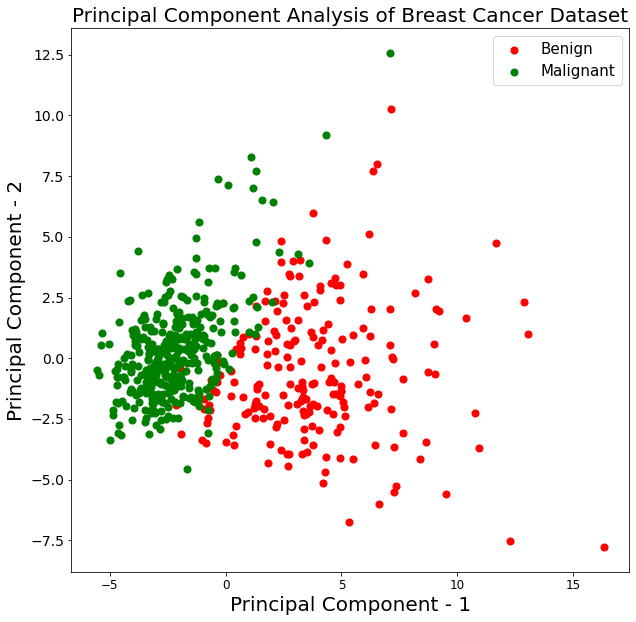

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1'],
               principal_breast_Df.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)
plt.legend(targets, prop={'size': 15})

plt.show()

Dari grafik di atas, kita dapat mengamati bahwa dua kelas benign dan malignant, ketika diproyeksikan ke ruang dua dimensi, dapat dipisahkan secara linier sampai batas tertentu. Pengamatan lain dapat berupa penyebaran kelas benign dibandingkan dengan kelas malignant.

## K-Means Clustering

### How is Clustering an Unsupersived Learning Problem?

## K-Means with Python

In [40]:
from sklearn.cluster import KMeans

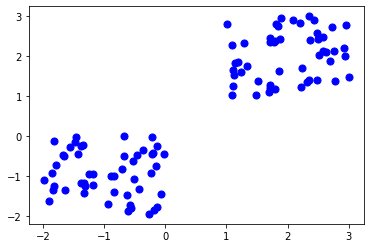

In [41]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


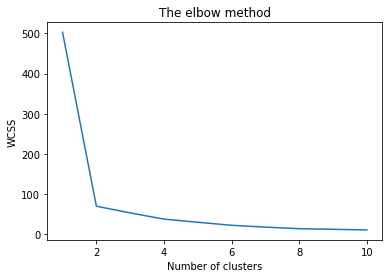

In [42]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [43]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [44]:
Kmean.cluster_centers_

array([[-0.95211166, -0.91942387],
       [ 2.00241559,  2.0120644 ]])

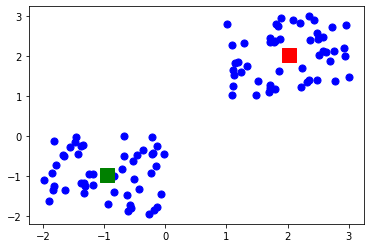

In [45]:
plt.scatter(X[ : , 0], X[ : , 1], s=50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

#### Example: masalah segmentasi pelanggan grosir

Tujuan dari masalah ini adalah untuk mengimplementasikan klien distributor grosir berdasarkan pengeluaran tahunan mereka pada berbagai produk, sperti susu, toko bahan makanan, wilayah, dll.

Pertama import library yang diperlukan:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans

Selanjutnya, load data dan melihat lima baris pertama:

In [47]:
data = pd.read_csv(r"Wholesale_customers_data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Dari hasil di atas, didapat bahwa ada banyak variasi dalam besaran datanya. Variabel seperti Channel dan Region memiliki magnitude yang lebih rendah sedangkan variabel seperti Fresh, Milk, Grocery, dll memiliki magnitude yang lebih tinggi.

Karena K-Means adalah algoritme berbasis jarak, perbedaan magnitude ini dapat menimbulkan masalah. Jadi, pertama-tama kita bawa semua vaariable ke magnitube yang sama:

In [49]:
#standardizing the data
from sklearn .preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#statistics of scsled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Membuat fungsi K-Means

In [50]:
#defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

#fitting the k-means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

Setelah menginisialisasi dua cluster. Mari kita evaluasi seberapa baik cluster terbentuk. Untuk melakukan itu, kita akan menghitung inersia dari cluster.

In [51]:
#inertia on the fitted data
kmeans.inertia_

2599.38555935614

Didapat nilai inersia hampir 2600. Sekarang tentukan jumlah optimal cluster menggunakan elbow curve.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

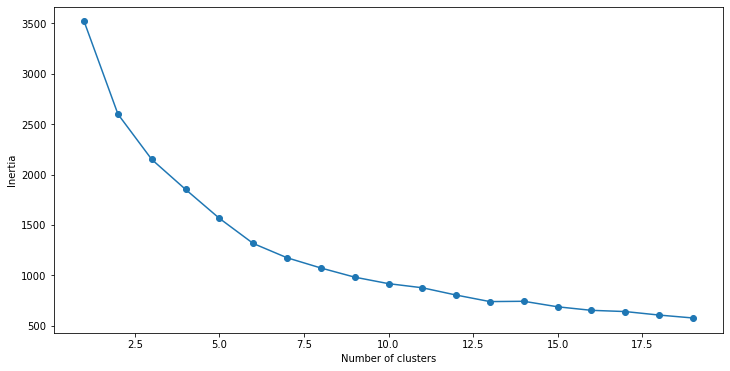

In [58]:
#fitting multiple k-means algorithm and storing the values in an empty list
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters = cluster, init ='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
#converting the result into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') #within cluster sum of squares

In [60]:
#kmeans using 5 clusters and kmeans++ initialization

kmeans = KMeans(#n_jobs = -1,
               n_clusters=6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

Terakhir kita lihat jumlah nilai poin di setiap cluster yang dibentuk di atas:

In [61]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    190
5    126
0     88
4     24
2     11
3      1
Name: cluster, dtype: int64

Jadi, ada 88 titik data yang termasuk dalam cluster 1 (indeks 0), dan seterusnya.

### Save and Load Models

### Finalize Your Model with pickle

Pickle adalah cara standar untuk membuat serialisasi objek dengan Python.

In [62]:
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

#import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

#converting string labels into numbers
weather_encoded = le.fit_transform(weather)

#converting string labels into numbers
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)

#combining weather and temp into single listof tuples
features = list(zip(weather_encoded,temp_encoded))

#import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

#create a gaussian classifier
model = GaussianNB()

#train the model using the training sets
model.fit(features,label)

#save the model to disk
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [63]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

In [64]:
loaded_model.predict([[0,2]])

array([1], dtype=int64)